<a href="https://colab.research.google.com/github/UWAGroves/Homework-7/blob/main/HomeWork_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import packages and link Gdrive

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import expon
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
import xarray as xr
!pip install cartopy geoviews hvplot
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import hvplot.xarray
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import drive

drive.mount('/content/drive')

filedir = "/content/drive/MyDrive/"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.3/547.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 5.4 MB/s eta 0:00:00


Mounted at /content/drive


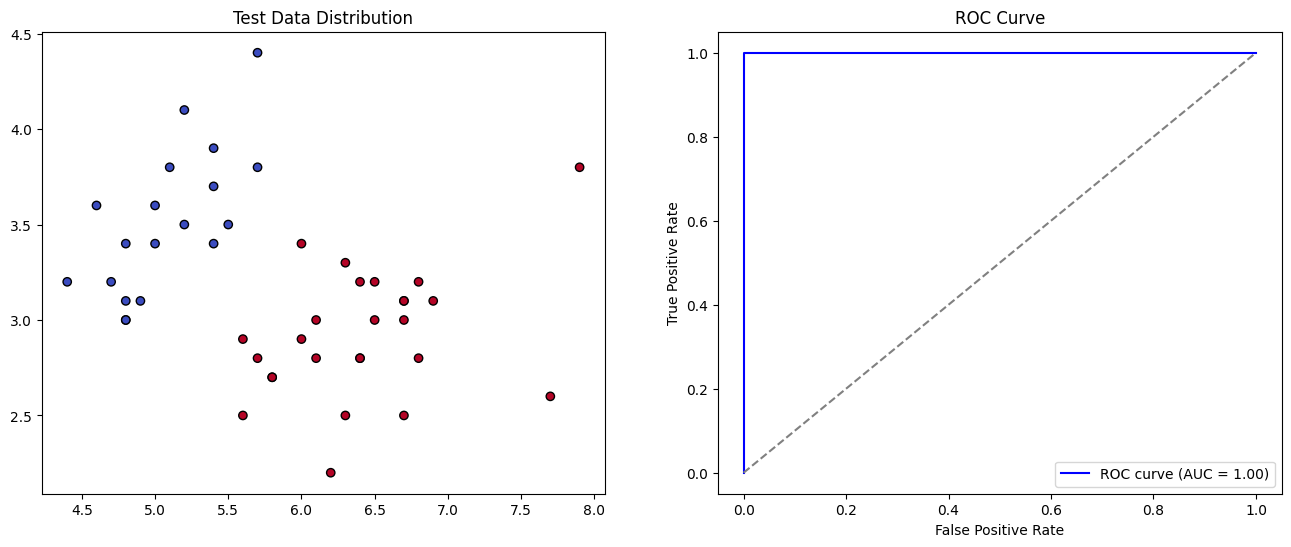

Confusion Matrix:
 [[19  0]
 [ 0 26]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC: 1.0


In [36]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split


#Load data
X, y = load_iris(return_X_y=True)

#Convert to binary Setosa (0) vs. Non-Setosa (1)
y_binary = np.where(y == 0, 0, 1)

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

#Train a logistic regression model
LogMod = LogisticRegression()
LogMod.fit(X_train, y_train)

#Make predictions
y_pred = LogMod.predict(X_test)
y_prob = LogMod.predict_proba(X_test)[:, 1]


#Generate confusion matrix and performance metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

#Plot ROC curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

#Scatter plot of data
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k')
ax[0].set_title('Test Data Distribution')

#ROC plot curve
ax[1].plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
ax[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve')
ax[1].legend()

plt.show()

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", roc_auc)


In [58]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data  # Features
y = wine.target  # Labels

# Split into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize SVM classifiers with different kernels
svm_linear = SVC(kernel='linear') #random_state=42
svm_rbf = SVC(kernel='rbf')
svm_poly = SVC(kernel='poly') # degree=3, random_state=42

# Train the models
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)

# Calculate accuracy for each model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

# Calculate precision for each model
precision_linear = precision_score(y_test, y_pred_linear, average='weighted', zero_division=1)
precision_rbf = precision_score(y_test, y_pred_rbf, average='weighted', zero_division=1)
precision_poly = precision_score(y_test, y_pred_poly, average='weighted', zero_division=1)

# Calculate recall for each model
recall_linear = recall_score(y_test, y_pred_linear, average='weighted', zero_division=1)
recall_rbf = recall_score(y_test, y_pred_rbf, average='weighted', zero_division=1)
recall_poly = recall_score(y_test, y_pred_poly, average='weighted', zero_division=1)


# Calculate F1 for each model
f1_linear = f1_score(y_test, y_pred_linear, average='weighted', zero_division=1)
f1_rbf = f1_score(y_test, y_pred_rbf, average='weighted', zero_division=1)
f1_poly = f1_score(y_test, y_pred_poly, average='weighted', zero_division=1)


# Display the results
print(f"Linear Kernel: Accuracy {accuracy_linear:.4f}")
print(f"Linear Kernel: Precision {precision_linear:.4f}")
print(f"Linear Kernel: Recall {recall_linear:.4f}")
print(f"Linear Kernel: F1 {f1_linear:.4f}")

print(f"--------------------------------------------------------------")
print(f"RBF Kernel: Accuracy {accuracy_rbf:.4f}")
print(f"RBF Kernel: Precision {precision_rbf:.4f}")
print(f"RBF Kernel: Recall {recall_rbf:.4f}")
print(f"RBF Kernel: F1 {f1_rbf:.4f}")

print(f"--------------------------------------------------------------")
print(f"Polynomial Kernel: Accuracy {accuracy_poly:.4f}")
print(f"Polynomial Kernel: Precision {precision_poly:.4f}")
print(f"Polynomial Kernel: Recall {recall_poly:.4f}")
print(f"Polynomial Kernel: F1 {f1_poly:.4f}")




Linear Kernel: Accuracy 0.9778
Linear Kernel: Precision 0.9795
Linear Kernel: Recall 0.9778
Linear Kernel: F1 0.9779
--------------------------------------------------------------
RBF Kernel: Accuracy 0.7111
RBF Kernel: Precision 0.6995
RBF Kernel: Recall 0.7111
RBF Kernel: F1 0.7016
--------------------------------------------------------------
Polynomial Kernel: Accuracy 0.7556
Polynomial Kernel: Precision 0.7518
Polynomial Kernel: Recall 0.7556
Polynomial Kernel: F1 0.7028


In [59]:
#The linear model performed best in all metrics.
#The radial basis function (RBF) and the polynomial model performed similarly with the polynomial performing slightly better.
#With the excepting of the precision metric in which it performed much better than the RBF model.
#The linear model being the most accurate might imply the data is linearly separable, meaning it could be separated using a straight line.
